# Futebol!

Een sport vol traditie en historie. In alle uithoeken van de wereld wordt het gespeeld en kent iedereen namen als Pele en Maradona. En hoewel het grote geld vooral rondgaat bij het clubvoetbal, blijft het interlandvoetbal het hoogst in aanzien, met eens in de 4 jaar het WK als grote hoogtepunt.

In dit document wordt een database gebruikt met daarin alle interlands ooit gespeeld. Vanaf 1872, toen Schotland tegen Engeland aantrad, tot nu. Ook is er een database waarin alle penaltie-series staan.

[Link naar de databases](https://www.kaggle.com/code/joaopdrg/international-football-results-data-visualization)

Met deze 2 databases gaan we kijken of er opvallende zaken zijn, ranglijstjes maken en tabellen creeëren.

Eerst importeren we alle modules die we nodig gaan hebben en laden we de 2 databases in.

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#inladen bestanden
interlands = pd.read_csv("results.csv")
penalties = pd.read_csv("shootouts.csv")
# formaat van de "date" kolom aanpassen naar DateTime voor makkelijkere verwerking
interlands["date"] = pd.to_datetime(interlands["date"])
penalties["date"] = pd.to_datetime(penalties["date"])
# kolom toeveoegen met het jaartal
interlands["year"] = pd.DatetimeIndex(interlands["date"]).year
# penalties database toevoegen aan interlands
interlands = pd.merge(interlands, penalties, how="left", on=["date", "home_team", "away_team"])

We beginnen met het verkennen van de database. 

In [2]:
interlands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43421 entries, 0 to 43420
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        43421 non-null  datetime64[ns]
 1   home_team   43421 non-null  object        
 2   away_team   43421 non-null  object        
 3   home_score  43421 non-null  int64         
 4   away_score  43421 non-null  int64         
 5   tournament  43421 non-null  object        
 6   city        43421 non-null  object        
 7   country     43421 non-null  object        
 8   neutral     43421 non-null  bool          
 9   year        43421 non-null  int64         
 10  winner      455 non-null    object        
dtypes: bool(1), datetime64[ns](1), int64(3), object(6)
memory usage: 3.7+ MB


We hebben dus 10 kolommen om mee te werken en de "date" kolom is inderdaad aangepast naar DateTime.\
In de 10e kolom staat de winnaar van de eventuele penaltie-reeks. \
Deze naam gaan we aanpassen en de "NaN" waarden omzetten naar "-".

In [3]:
interlands.rename(columns={"winner":"penalty_winner?"}, inplace=True)
interlands = interlands.where(pd.notnull(interlands), "-")
interlands.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,penalty_winner?
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,-
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,-
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,-
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,-
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,-


We hadden bij het verkennen al gezien dat de "penalty" kolom de enige was waar er data ontbrak.
Dit zou nu verholpen moeten zijn:

In [4]:
interlands.isnull().sum(axis=0)

date               0
home_team          0
away_team          0
home_score         0
away_score         0
tournament         0
city               0
country            0
neutral            0
year               0
penalty_winner?    0
dtype: int64

Er zijn gelukkig geen ontbrekende gegevens meer!
Even een kijkje in de eerste 10 rijen van de database.

In [5]:
interlands.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,penalty_winner?
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,-
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,-
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,-
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,-
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,-
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,1876,-
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,1877,-
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,1877,-
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,1878,-
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,1878,-


Het begon allemaal bijna 150 jaar geleden met de wedstrijd Schotland-Engeland.\
Deze 2 landen leken vervolgens in maart een soort traditie te hebben om tegen elkaar te spelen.
In 1876 deed Wales daar voor het eerst aan mee.

Voor de leesbaarheid zou het handiger zijn om de index te laten beginnen bij 1.

In [6]:
interlands.index = np.arange(1, len(interlands)+1)
interlands.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,penalty_winner?
1,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,-
2,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,-
3,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,-
4,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,-
5,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,-
6,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,1876,-
7,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,1877,-
8,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,1877,-
9,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,1878,-
10,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,1878,-


Dat ziet er beter.
Nu een kijkje bij de laatste 5 rijen.

In [7]:
interlands.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,penalty_winner?
43417,2022-03-30,Mexico,El Salvador,2,0,FIFA World Cup qualification,Mexico City,Mexico,False,2022,-
43418,2022-03-30,Costa Rica,United States,2,0,FIFA World Cup qualification,San José,Costa Rica,False,2022,-
43419,2022-03-30,Panama,Canada,1,0,FIFA World Cup qualification,Panama City,Panama,False,2022,-
43420,2022-03-30,Jamaica,Honduras,2,1,FIFA World Cup qualification,Kingston,Jamaica,False,2022,-
43421,2022-03-30,Solomon Islands,New Zealand,0,5,FIFA World Cup qualification,Doha,Qatar,True,2022,-


Totaal aantal interlands ooit:

In [8]:
len(interlands)

43421

Een grafiek met het aantal interlands over de jaren heen:

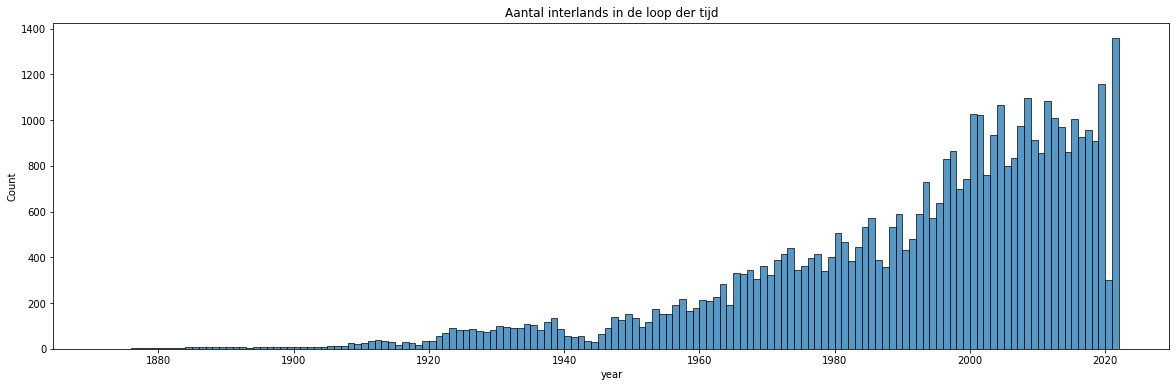

In [9]:
plt.figure(figsize=(20,6))
plt.title(label="Aantal interlands in de loop der tijd")
sns.histplot(interlands.year, bins=150);

Er is een duidelijke toename te zien in de loop van de jaren, met uitzondering van het jaar waarin Covid-19 de wereld behoorlijk stilzette.

Waar zouden de meeste interlands gespeeld zijn?

In [10]:
interlands["city"].value_counts().head()

Kuala Lumpur    667
Doha            502
Bangkok         427
London          418
Budapest        405
Name: city, dtype: int64

Dat was niet verwacht! Maleisië is niet echt een vooraanstaand voetballand. \
Benieuwd of dat ook echt klopt, we gaan is kijken hoevaak Maleisië thuis heeft gespeeld.

In [11]:
len(interlands[interlands["home_team"] == "Malaysia"])

390

390 is al behoorlijk veel, maar nog niet de 667 die er totaal gespeeld zijn. \
Verder onderzoeken, misschien wordt er wat meer duidelijk als we bekijken wat voor soort wedstrijden daar zijn gehouden.

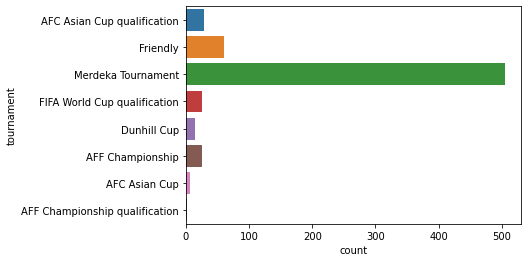

In [12]:
kuala = interlands[interlands["city"] == "Kuala Lumpur"]
sns.countplot(y= "tournament", data=kuala);

Dat is hem! Er zijn daar maarliefst 505 wedstrijden gehouden voor het vrij onbekende Merdeka Tournament.\
Bij wat nader onderzoek bleek dat het [Merdeka Tournament](https://en.wikipedia.org/wiki/Pestabola_Merdeka) 40 keer te zijn gehouden. \
Dit toernooi wordt altijd in Maleisië en de finale bijna altijd in Kuala Lampur gespeeld.

Nu kijken in welk land de meeste interlands zijn gehouden.

In [13]:
interlands["country"].value_counts().head(5)

United States    1241
France            820
Malaysia          744
England           719
Sweden            656
Name: country, dtype: int64

Wat zou de grootste uitslag ooit zijn geweest?

In [14]:
# eerst een nieuwe kolom maken met totaal doulpunten per wedstrijd
interlands["goals"] = interlands["home_score"] + interlands["away_score"]
# interland met meeste goals filteren
interlands.iloc[[interlands["goals"].argmax()]]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,penalty_winner?,goals
23966,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,2001,-,31


### Fifa World Cup

We gaan nu kijken naar het belangrijkste toernooi ter wereld: de Fifa World Cup.\
In 1930 vond de eerste editie plaats in Uruguay, sindsdien (met uitzondering rondom de 2e wereldoorlog) wordt het elke 4 jaar gehouden.

In [15]:
world_cup = interlands[interlands["tournament"] == "FIFA World Cup"]
world_cup

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,penalty_winner?,goals
1315,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-,3
1316,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,-,5
1317,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,-,3
1318,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-,4
1319,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,-,1
...,...,...,...,...,...,...,...,...,...,...,...,...
40130,2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False,2018,Croatia,4
40131,2018-07-10,France,Belgium,1,0,FIFA World Cup,Saint Petersburg,Russia,True,2018,-,1
40132,2018-07-11,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True,2018,-,3
40133,2018-07-14,Belgium,England,2,0,FIFA World Cup,Saint Petersburg,Russia,True,2018,-,2


Hoeveel landen hebben totaal meegedaan aan het WK?

In [16]:
landen = []
for i in range(0, len(world_cup)):
    if world_cup["home_team"].iloc[i] not in landen:
        landen.append(world_cup["home_team"].iloc[i])
    if world_cup["away_team"].iloc[i] not in landen:
        landen.append(world_cup["away_team"].iloc[i])
len(landen)
       

81

Welke 25 landen hebben de meeste duels gespaald op een WK?

In [17]:
thuis = world_cup["home_team"].value_counts()
uit = world_cup["away_team"].value_counts()
totaal = thuis.add(uit, fill_value=0).sort_values(ascending=False).astype(int).head(25)
totaal

Germany           109
Brazil            109
Italy              83
Argentina          81
England            69
France             66
Spain              63
Mexico             57
Uruguay            56
Sweden             51
Netherlands        50
Belgium            48
Russia             45
Switzerland        37
Poland             34
South Korea        34
Yugoslavia         33
Chile              33
United States      33
Hungary            32
Portugal           30
Czechoslovakia     30
Austria            29
Paraguay           27
Bulgaria           26
dtype: int32

Met deze 25 landen gaan we een nieuwe database maken met als doel een ranglijst te creëren.

In [18]:
# van de lijst van 25 landen filteren we de landen eruit
toplanden = totaal.keys()
# deze lijst gaat gevuld worden met een aparte lijst per land
totaal_lijst = []
# gebruik van een for loop om door alle 25 landen heen te gaan
for i in range(0, len(toplanden)):
    # de gegevens die per land verzameld gaat worden
    gespeeld = 0
    gewonnen = 0
    gelijk = 0
    verloren = 0
    goals_voor = 0
    goals_tegen = 0
    # de filtering om tot de uitslagen te komen
    thuis_winst = world_cup[(world_cup["home_team"] == toplanden[i]) & (world_cup["home_score"] > world_cup["away_score"])]
    thuis_nederlaag = world_cup[(world_cup["home_team"] == toplanden[i]) & (world_cup["home_score"] < world_cup["away_score"])]
    thuis_gelijkspel = world_cup[(world_cup["home_team"] == toplanden[i]) & (world_cup["home_score"] == world_cup["away_score"])]
    uit_gelijkspel = world_cup[(world_cup["away_team"] == toplanden[i]) & (world_cup["home_score"] == world_cup["away_score"])]
    uit_winst = world_cup[(world_cup["away_team"] == toplanden[i]) & (world_cup["home_score"] < world_cup["away_score"])]
    uit_nederlaag = world_cup[(world_cup["away_team"] == toplanden[i]) & (world_cup["home_score"] > world_cup["away_score"])]
    # de filtering om tot de goals te komen
    thuis_goals = world_cup[world_cup["home_team"] == toplanden[i]]
    uit_goals = world_cup[world_cup["away_team"] == toplanden[i]]    
    # optellen en toevoegen van de gegevens
    gespeeld += len(thuis_winst)
    gespeeld += len(thuis_nederlaag)
    gespeeld += len(thuis_gelijkspel)
    gespeeld += len(uit_gelijkspel)
    gespeeld += len(uit_winst)
    gespeeld += len(uit_nederlaag)
    gewonnen += len(thuis_winst)
    gewonnen += len(uit_winst)
    gelijk += len(thuis_gelijkspel)
    gelijk += len(uit_gelijkspel)
    verloren += len(thuis_nederlaag)
    verloren += len(uit_nederlaag)
    goals_voor = thuis_goals["home_score"].sum() + uit_goals["away_score"].sum()
    goals_tegen = thuis_goals["away_score"].sum() + uit_goals["home_score"].sum()
    # de lijst van 1 land is nu gevuld en wordt toegevoegd aan de totaal_lijst
    totaal_lijst.append([toplanden[i], gespeeld, gewonnen, gelijk, verloren, goals_voor, goals_tegen])
totaal_lijst

[['Germany', 109, 67, 20, 22, 226, 125],
 ['Brazil', 109, 73, 18, 18, 229, 105],
 ['Italy', 83, 45, 21, 17, 128, 77],
 ['Argentina', 81, 43, 15, 23, 137, 93],
 ['England', 69, 29, 21, 19, 91, 64],
 ['France', 66, 34, 13, 19, 120, 77],
 ['Spain', 63, 30, 15, 18, 99, 72],
 ['Mexico', 57, 16, 14, 27, 60, 98],
 ['Uruguay', 56, 24, 12, 20, 87, 74],
 ['Sweden', 51, 19, 13, 19, 80, 73],
 ['Netherlands', 50, 27, 12, 11, 86, 48],
 ['Belgium', 48, 20, 9, 19, 68, 72],
 ['Russia', 45, 19, 10, 16, 77, 54],
 ['Switzerland', 37, 12, 8, 17, 50, 64],
 ['Poland', 34, 16, 5, 13, 46, 45],
 ['South Korea', 34, 6, 9, 19, 34, 70],
 ['Yugoslavia', 33, 14, 7, 12, 55, 42],
 ['Chile', 33, 11, 7, 15, 40, 49],
 ['United States', 33, 8, 6, 19, 37, 62],
 ['Hungary', 32, 15, 3, 14, 87, 57],
 ['Portugal', 30, 14, 6, 10, 49, 35],
 ['Czechoslovakia', 30, 11, 5, 14, 44, 45],
 ['Austria', 29, 12, 4, 13, 43, 47],
 ['Paraguay', 27, 7, 10, 10, 30, 38],
 ['Bulgaria', 26, 3, 8, 15, 22, 53]]

Nu we een mooie lijst hebben gemaakt, gaan we dit omzetten in een DataFrame.

In [19]:
ranglijst = pd.DataFrame(totaal_lijst, columns=["land", "gespeeld", "gewonnen", "gelijk", "verloren", "goals_voor", "goals_tegen"])
ranglijst

,land,gespeeld,gewonnen,gelijk,verloren,goals_voor,goals_tegen
0,Germany,109,67,20,22,226,125
1,Brazil,109,73,18,18,229,105
2,Italy,83,45,21,17,128,77
3,Argentina,81,43,15,23,137,93
4,England,69,29,21,19,91,64
5,France,66,34,13,19,120,77
6,Spain,63,30,15,18,99,72
7,Mexico,57,16,14,27,60,98
8,Uruguay,56,24,12,20,87,74
9,Sweden,51,19,13,19,80,73


Dat ziet er al goed uit.
Om wat structuur aan te brengen en een ranglijst te kunnen maken, maken we een nieuwe kolom aan met het aantal punten.\
Voor een overwinning krijgt een land 3 punten, voor een gelijkspel 1 punt en bij verlies 0 punten.\
We sorteren het geheel op basis van meeste punten, van hoog naar laag.\
Ook passen we de index aan zodat index 1 ook verwijst naar het land dat eerste staat.

In [20]:
ranglijst["punten"] = (ranglijst["gewonnen"]*3) + (ranglijst["gelijk"])
ranglijst.sort_values(by="punten", ascending=False, inplace=True)
ranglijst.index = np.arange(1, len(ranglijst)+1)
ranglijst

,land,gespeeld,gewonnen,gelijk,verloren,goals_voor,goals_tegen,punten
1,Brazil,109,73,18,18,229,105,237
2,Germany,109,67,20,22,226,125,221
3,Italy,83,45,21,17,128,77,156
4,Argentina,81,43,15,23,137,93,144
5,France,66,34,13,19,120,77,115
6,England,69,29,21,19,91,64,108
7,Spain,63,30,15,18,99,72,105
8,Netherlands,50,27,12,11,86,48,93
9,Uruguay,56,24,12,20,87,74,84
10,Sweden,51,19,13,19,80,73,70


Brazilië heeft dus in geschiedenis van de Fifa World Cup de meeste punten gehaald!
De reden dat landen verschillend aantal wedstrijden hebben gespeeld komt omdat landen zich vaker geplaatst hebben en verder zijn gekomen in het toernooi en dus het meest succesvol zijn geweest.
Toch is het interessant om te kijken hoeveel punten ze gemiddeld per wedstrijd halen.

In [21]:
# nieuwe kolom maken met als waarden punten/wedstrijden
ranglijst["punten_per_wedstrijd"] = ranglijst["punten"] / ranglijst["gespeeld"]
# sorteren op basis van de nieuwe kolom
ranglijst.sort_values(by="punten_per_wedstrijd", ascending=False, inplace=True)
# opnieuw de index aanpassen beginnend bij 1
ranglijst.index = np.arange(1, len(ranglijst)+1)
ranglijst

,land,gespeeld,gewonnen,gelijk,verloren,goals_voor,goals_tegen,punten,punten_per_wedstrijd
1,Brazil,109,73,18,18,229,105,237,2.174312
2,Germany,109,67,20,22,226,125,221,2.027523
3,Italy,83,45,21,17,128,77,156,1.879518
4,Netherlands,50,27,12,11,86,48,93,1.860000
5,Argentina,81,43,15,23,137,93,144,1.777778
6,France,66,34,13,19,120,77,115,1.742424
7,Spain,63,30,15,18,99,72,105,1.666667
8,Portugal,30,14,6,10,49,35,48,1.600000
9,England,69,29,21,19,91,64,108,1.565217
10,Poland,34,16,5,13,46,45,53,1.558824


Brazilië, Duitsland en Italië blijven de onbetwiste beste 3 landen. Landen als Nederland, Portugal en Polen staan wel een stuk hoger bij deze manier van rangschikken.

Alle wk wedstrijden die de top 3 tegen elkaar speelde:

In [22]:
topdrie = ["Brazil", "Germany", "Italy"]
topdrie_wedstrijden = world_cup[world_cup["home_team"].isin(topdrie) & world_cup["away_team"].isin(topdrie)]
topdrie_wedstrijden

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,penalty_winner?,goals
2121,1938-06-16,Brazil,Italy,1,2,FIFA World Cup,Marseille,France,True,1938,-,3
5143,1962-05-31,Germany,Italy,0,0,FIFA World Cup,Santiago,Chile,True,1962,-,0
7572,1970-06-17,Germany,Italy,3,4,FIFA World Cup,Mexico City,Mexico,True,1970,-,7
7576,1970-06-21,Brazil,Italy,4,1,FIFA World Cup,Mexico City,Mexico,True,1970,-,5
10682,1978-06-14,Germany,Italy,0,0,FIFA World Cup,Buenos Aires,Argentina,True,1978,-,0
10699,1978-06-24,Brazil,Italy,2,1,FIFA World Cup,Buenos Aires,Argentina,True,1978,-,3
12490,1982-07-05,Italy,Brazil,3,2,FIFA World Cup,Barcelona,Spain,True,1982,-,5
12498,1982-07-11,Italy,Germany,3,1,FIFA World Cup,Madrid,Spain,True,1982,-,4
18603,1994-07-17,Brazil,Italy,0,0,FIFA World Cup,Pasadena,United States,True,1994,Brazil,0
25038,2002-06-30,Germany,Brazil,0,2,FIFA World Cup,Yokohama,Japan,True,2002,-,2


De top 5 landen die het vaakst een penalty-serie heeft gewonnen op een WK:

In [23]:
pingels = world_cup[world_cup["penalty_winner?"] != "-"]
pingels["penalty_winner?"].value_counts().head()

Germany      4
Argentina    4
Brazil       3
Croatia      2
France       2
Name: penalty_winner?, dtype: int64

We gaan nu proberen alle finales van het WK in beeld te brengen.

In [24]:
# eerst de jaartallen eruit filteren in waar een WK is gehouden
jr = world_cup[world_cup["neutral"] == False]
jr = jr["year"].drop_duplicates()
# aanmaken van een lijst waarin we afzonderlijke lijsten kunnen plaatsen
hist = []
# for loop waarin we de data gaan vangen van de laatste wedstrijd op een WK, wat de finale zou moeten zijn
for jaar in jr.values:
    finale = world_cup[world_cup["year"] == jaar].iloc[-1]
    editie = [finale["year"], finale["country"], finale["home_team"], finale["away_team"],
              finale["home_score"], finale["away_score"], finale["penalty_winner?"]]
    hist.append(editie)
# de verzamelde data in een DataFrme gieten
historie = pd.DataFrame(hist, columns=["jaar", "organisator", "land 1", "land 2", 
                                       "score 1", "score 2", "penalty winnaar?"])
historie.index = np.arange(1, len(historie)+1)
historie

,jaar,organisator,land 1,land 2,score 1,score 2,penalty winnaar?
1,1930,Uruguay,Uruguay,Argentina,4,2,-
2,1934,Italy,Italy,Czechoslovakia,2,1,-
3,1938,France,Hungary,Italy,2,4,-
4,1950,Brazil,Spain,Sweden,1,3,-
5,1954,Switzerland,Germany,Hungary,3,2,-
6,1958,Sweden,Sweden,Brazil,2,5,-
7,1962,Chile,Brazil,Czechoslovakia,3,1,-
8,1966,England,England,Germany,4,2,-
9,1970,Mexico,Brazil,Italy,4,1,-
10,1974,Germany,Germany,Netherlands,2,1,-


Dat ziet er op eerste gezicht goed uit, met uitzondering van de editie in 1950.\
In dat jaar was er niet een echte finale, maar werd er een finalegroep gespeeld.\
Achteraf werd daar de [voorlaatste wedstrijd als finale](https://nl.wikipedia.org/wiki/Finale_wereldkampioenschap_voetbal_1950) gezien.\
Uruguay zorgde voor een enorme verassing door topfavoriet Brazilië in Rio de Janeiro te verslaan.

We gaan dit "foutje" in de DataFrame aanpassen

In [25]:
# eerste de voorlaatste wedstrijd in 1950 selecteren
echte_finale = world_cup[world_cup["year"] == 1950].iloc[-2]
# data verzamelen van die wedstrijd
maracana = [echte_finale["year"], echte_finale["country"], echte_finale["home_team"], echte_finale["away_team"],
            echte_finale["home_score"], echte_finale["away_score"], echte_finale["penalty_winner?"]]
# verkeerde finale vervangen voor de goede  
historie.loc[4] = maracana
historie

,jaar,organisator,land 1,land 2,score 1,score 2,penalty winnaar?
1,1930,Uruguay,Uruguay,Argentina,4,2,-
2,1934,Italy,Italy,Czechoslovakia,2,1,-
3,1938,France,Hungary,Italy,2,4,-
4,1950,Brazil,Brazil,Uruguay,1,2,-
5,1954,Switzerland,Germany,Hungary,3,2,-
6,1958,Sweden,Sweden,Brazil,2,5,-
7,1962,Chile,Brazil,Czechoslovakia,3,1,-
8,1966,England,England,Germany,4,2,-
9,1970,Mexico,Brazil,Italy,4,1,-
10,1974,Germany,Germany,Netherlands,2,1,-


Welke landen zijn er ooit wereldkampioen geworden en hoevaak?

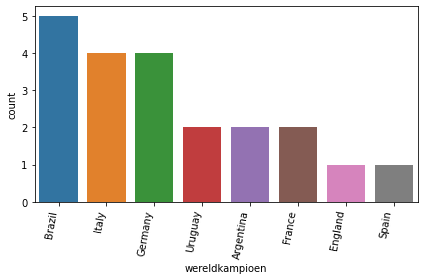

In [26]:
# eerst een nieuwe kolom maken mbv een lambda expressie
historie["wereldkampioen"] = historie.apply(lambda x : x["land 1"] if x["score 1"] > x["score 2"]
else (x["land 2"] if x["score 2"] > x["score 1"] else x["penalty winnaar?"]), axis=1)
# staafdiagram maken
fig, ax = plt.subplots()
ax = sns.countplot(x="wereldkampioen", data=historie, order=historie["wereldkampioen"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right")
plt.tight_layout()

Als laatste gaan we een staafdiafram maken met het aantal wedstrijden wat elk land heeft gespaald,\
onderverdeeld in winst, gelijkspel en verlies.

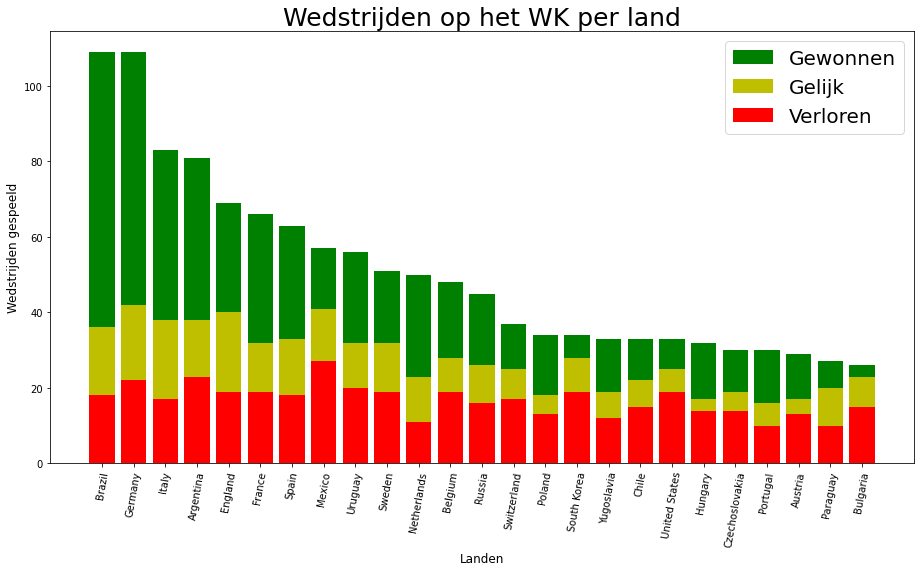

In [27]:
# Ranglijst sorteren op aantal wedstrijden
ranglijst = ranglijst.sort_values(by=["gespeeld"], ascending=False)
# figuur en axes aanmaken
fig = plt.figure(figsize=(12,6))
axes = fig.add_axes([0, 0, 1, 1])
# label van de namen op de x-as 80 graden draaien zodat ze beter leesbaar zijn
plt.xticks(rotation= 80)
# verschillende staven aanmaken die samen het aantal wedstrijden vormen per land
plt.bar(ranglijst["land"], ranglijst["verloren"], color="r", label="Verloren")
plt.bar(ranglijst["land"], ranglijst["gelijk"], bottom=ranglijst["verloren"], color="y", label="Gelijk")
plt.bar(ranglijst["land"], ranglijst["gewonnen"], bottom=ranglijst["verloren"]+ranglijst["gelijk"], color="g", label="Gewonnen")
# titel geven een de diagram
plt.title(label="Wedstrijden op het WK per land", fontsize=25)
# Namen geven aan de labels van de x en y-as
plt.xlabel("Landen", fontsize=12)
plt.ylabel("Wedstrijden gespeeld", fontsize=12)
# legende bewerken zodat de volgorde overeenkomt met die van de staafdiagram
current_handles, current_labels = plt.gca().get_legend_handles_labels()
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))
plt.legend(reversed_handles,reversed_labels, prop={"size":20});

We hebben een korte wandeling gemaakt door de 150 jaar oude geschiedenis van het interlandvoetbal.
Er kwamen wat verrassingen naar boven en er werd duidelijk welke landen het voetbal domineren.